In [1]:
#?update comment reason for importing each libs here 
import numpy as np
import sklearn.datasets as dataset
import matplotlib.pyplot as plt

In [2]:
#create dataset
# sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)[source]¶
X,y = dataset.make_moons(n_samples = 400,noise = 0.2)

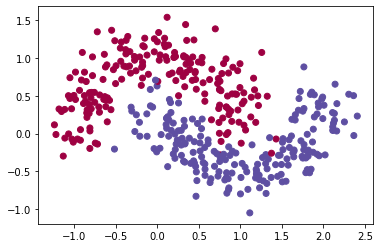

In [19]:
plt.scatter(X[:,0],X[:,1],c=y.T,cmap=plt.cm.Spectral)

In [4]:
#initialize parameters (W,b)
def initialize_parameters():
    parameters = {}
    W = np.random.randn(1,2)*0.01
    b=0
    parameters['W']=W
    parameters['b']=b
    return parameters


In [5]:
#activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

In [6]:
#forward propagation
def forward(X,parameters):
    Z=np.dot(parameters['W'],X.T)+parameters['b']
    A = sigmoid(Z)
    cache={}
    cache['Z']=Z
    
    return cache,A

In [7]:
#As the sigmoid activation function is used we need to use 
#BCE loss function else the cost function will not be convergent and have multiple
#local minimas
def calc_loss(A,y):
    y_hat = A
    num_samples = y_hat.shape[1]
    BCE_loss = -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    return BCE_loss/num_samples

In [8]:
# Equations for this architecture would be 
# dZ = A - Y
# dW = (1/m)*dZ.X.T
#db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
def backprop(X,y,A):
    m = A.shape[1]
    dZ = A - y
    dW = (1/m)*np.dot(dZ,X)
    db = (1/m)*np.sum(dZ,axis = 1, keepdims = True)
    grads={}
    grads['dW'] = dW
    grads['db'] = db
    return grads  
    

In [9]:
def update_parameters(parameters,grads,learning_rate=0.5):
    parameters['W'] -= learning_rate*grads['dW']
    parameters['b'] -= learning_rate*grads['db']
    return parameters

In [10]:
def model(X,y):
    epoch = 2000
    y = y.reshape(1,len(y))
    parameters = initialize_parameters() # genarally we need to pass the layer dims in this
    for i in range(epoch):
        cache,A = forward(X,parameters)
        loss = calc_loss(A,y)
        if i%50==0:
            print('loss in epoch {} : {}'.format(i,loss))
        grads = backprop(X,y,A)
        parameters = update_parameters(parameters,grads,learning_rate=0.01)
    return parameters

In [13]:
def predict(X,parameters):
    _,predicted = forward(X,parameters)
    predicted[predicted<0.5] = 0
    predicted[predicted>0.5] = 1
    return predicted

In [12]:
parameters = model(X,y) 

loss in epoch 0 : 0.6893792898171067
loss in epoch 50 : 0.6439701276661804
loss in epoch 100 : 0.6068464794336283
loss in epoch 150 : 0.576099063574909
loss in epoch 200 : 0.5503084545608112
loss in epoch 250 : 0.5284212521637502
loss in epoch 300 : 0.5096495834245468
loss in epoch 350 : 0.4933969321076617
loss in epoch 400 : 0.4792054271382773
loss in epoch 450 : 0.46671877862371036
loss in epoch 500 : 0.45565613585506737
loss in epoch 550 : 0.4457934644899872
loss in epoch 600 : 0.4369501061144783
loss in epoch 650 : 0.42897894086727995
loss in epoch 700 : 0.4217590862533608
loss in epoch 750 : 0.4151904059809649
loss in epoch 800 : 0.409189328796799
loss in epoch 850 : 0.403685628371184
loss in epoch 900 : 0.39861991731070406
loss in epoch 950 : 0.3939416781678293
loss in epoch 1000 : 0.38960770271343187
loss in epoch 1050 : 0.385580844757622
loss in epoch 1100 : 0.38182901603437464
loss in epoch 1150 : 0.378324372139666
loss in epoch 1200 : 0.375042648263279
loss in epoch 1250 : 0.

In [14]:
 predicted = predict(X,parameters)

In [15]:
def accuracy(predicted,y):
    y = y.reshape(1,len(y))
    return (1 - np.sum(abs(y - predicted))/y.shape[1])*100

In [16]:
acc = accuracy(predicted,y)
print('Accuracy of the model is {0:.02f}%'.format(acc))

Accuracy of the model is 84.25%


In [17]:
def plot_decision_boundary(parameters): 
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = predict(np.c_[xx.ravel(), yy.ravel()],parameters) 
  #  print(Z)
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 
    plt.title("Decision Boundary for hidden layer size 3")

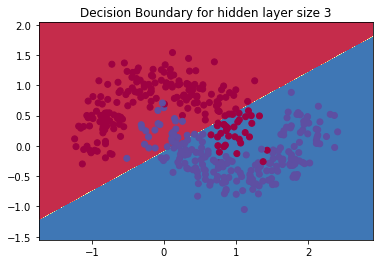

In [18]:
plot_decision_boundary(parameters)